In [1]:
#importing librarys
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, roc_curve, auc


# Set pandas options to display float values in full
pd.set_option('display.float_format', '{:.2f}'.format)


### Data Collection 

In [2]:
# Load the data
df=pd.read_csv("C:/Users/Ashyy/Desktop/NIT-Data Analytics/onlinefraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0


In [3]:
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5911433,404,CASH_OUT,304411.73,C452750412,5589.00,0.00,C359534268,237363.08,541774.81,0,0
3461285,257,CASH_OUT,23854.16,C59845919,0.00,0.00,C1699100984,118965.14,142819.29,0,0
1026786,48,CASH_IN,76748.80,C1737418168,8629241.49,8705990.29,C1492865671,1171791.20,1095042.40,0,0
4834989,347,CASH_IN,256968.46,C2013229423,29584.00,286552.46,C854247191,392797.46,135829.00,0,0
5075966,355,CASH_IN,253294.63,C165664720,1494262.87,1747557.50,C1824816416,1813254.26,1559959.62,0,0


In [5]:
df.shape 
#the dataset contains huge amount of data ie near to 63 lac 

(6362620, 11)

In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,142.33,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


In [7]:
df.drop(columns=['isFlaggedFraud'],inplace=True)
# dropping a column because of no usecase

### Data Pre-processing

In [8]:
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [9]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [10]:
df.head(10)
#we can see that there are lot of cases where values are zero and can be in any column so we ll impute them

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.00,0.00,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.00,0.00,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.00,0.00,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.00,40348.79,0


In [11]:
df[df.amount==0].shape #kind of looks like suspicious

(16, 10)

In [12]:
# Calculate percentage of zeros in each column
columns_to_check = ['amount','oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
zero_percentage = df[columns_to_check].apply(lambda x: (x == 0).mean() * 100)

# Print the results
print("Percentage of zero values in each column:")
print(zero_percentage)

Percentage of zero values in each column:
amount            0.00
oldbalanceOrg    33.04
newbalanceOrig   56.73
oldbalanceDest   42.50
newbalanceDest   38.34
dtype: float64


Imputing value at oldbalanceOrg, newbalanceOrig, oldbalanceDest and newbalanceDest for all columns.

In [13]:
# one zero imputation case in both sender and reciever pairs

# Sender pair imputation
mask_sender = (df['isFraud'] == 0) & ((df['oldbalanceOrg'] == 0) ^ (df['newbalanceOrig'] == 0))
df.loc[mask_sender & (df['oldbalanceOrg'] == 0), 'oldbalanceOrg'] = df['newbalanceOrig'] + df['amount']
df.loc[mask_sender & (df['newbalanceOrig'] == 0), 'newbalanceOrig'] = df['oldbalanceOrg'] - df['amount']

# Calculate median oldbalanceDest for each transaction type where oldbalanceDest is not zero
median_balances = df[(df['oldbalanceDest'] != 0) & (df['isFraud'] == 0)].groupby('type')['oldbalanceDest'].median()

# Receiver pair imputation
mask_receiver = (df['isFraud'] == 0) & (df['oldbalanceDest'] == 0) & (df['newbalanceDest'] != 0) & (df['type'].isin(['CASH_OUT', 'TRANSFER']))
df.loc[mask_receiver, 'oldbalanceDest'] = df.loc[mask_receiver, 'type'].map(median_balances)

# Verification checks (these don't modify the data, just compute some values)
sender_zero_count = ((df['oldbalanceOrg'] == 0) ^ (df['newbalanceOrig'] == 0)) & (df['isFraud'] == 0)
receiver_zero_count = ((df['oldbalanceDest'] == 0) ^ (df['newbalanceDest'] == 0)) & (df['isFraud'] == 0)

remaining_sender_zeros = sender_zero_count.sum()
remaining_receiver_zeros = receiver_zero_count.sum()
print(f"Non-fraud rows with one zero in sender pair: {remaining_sender_zeros}")
print(f"Non-fraud rows with one zero in receiver pair: {remaining_receiver_zeros}")

Non-fraud rows with one zero in sender pair: 0
Non-fraud rows with one zero in receiver pair: 125704


Above you can see there are still values which are 0 in the Recievers Pairs

In [14]:
# Function to report zero counts
def report_zero_counts(df, mask):
    return {
        'oldbalanceOrg': (df['oldbalanceOrg'] == 0)[mask].sum(),
        'newbalanceOrig': (df['newbalanceOrig'] == 0)[mask].sum(),
        'oldbalanceDest': (df['oldbalanceDest'] == 0)[mask].sum(),
        'newbalanceDest': (df['newbalanceDest'] == 0)[mask].sum()
    }

# Before imputation
non_fraud_mask = df['isFraud'] == 0
before_counts = report_zero_counts(df, non_fraud_mask)
print("Before imputation (zero counts for non-fraud cases):")
print(before_counts)

# Set random seed for reproducibility
np.random.seed(42)

# Function to generate random balance within specified range
def random_balance(size):
    return np.random.uniform(0, 1000000, size)

# Sender pair imputation
sender_zero_mask = (df['oldbalanceOrg'] == 0) & (df['newbalanceOrig'] == 0) & non_fraud_mask
df.loc[sender_zero_mask, 'oldbalanceOrg'] = random_balance(sender_zero_mask.sum())
df.loc[sender_zero_mask, 'newbalanceOrig'] = df.loc[sender_zero_mask, 'oldbalanceOrg'] - df.loc[sender_zero_mask, 'amount']

# Handle cases where only one of oldbalanceOrg or newbalanceOrig is zero
sender_one_zero_mask = ((df['oldbalanceOrg'] == 0) ^ (df['newbalanceOrig'] == 0)) & non_fraud_mask
df.loc[sender_one_zero_mask & (df['oldbalanceOrg'] == 0), 'oldbalanceOrg'] = df.loc[sender_one_zero_mask & (df['oldbalanceOrg'] == 0), 'newbalanceOrig'] + df.loc[sender_one_zero_mask & (df['oldbalanceOrg'] == 0), 'amount']
df.loc[sender_one_zero_mask & (df['newbalanceOrig'] == 0), 'newbalanceOrig'] = df.loc[sender_one_zero_mask & (df['newbalanceOrig'] == 0), 'oldbalanceOrg'] - df.loc[sender_one_zero_mask & (df['newbalanceOrig'] == 0), 'amount']

# Receiver pair imputation
receiver_zero_mask = (df['oldbalanceDest'] == 0) & (df['newbalanceDest'] == 0) & non_fraud_mask
df.loc[receiver_zero_mask, 'oldbalanceDest'] = random_balance(receiver_zero_mask.sum())
df.loc[receiver_zero_mask, 'newbalanceDest'] = df.loc[receiver_zero_mask, 'oldbalanceDest'] + df.loc[receiver_zero_mask, 'amount']

# Handle cases where only one of oldbalanceDest or newbalanceDest is zero
receiver_one_zero_mask = ((df['oldbalanceDest'] == 0) ^ (df['newbalanceDest'] == 0)) & non_fraud_mask
df.loc[receiver_one_zero_mask & (df['oldbalanceDest'] == 0), 'oldbalanceDest'] = df.loc[receiver_one_zero_mask & (df['oldbalanceDest'] == 0), 'newbalanceDest'] - df.loc[receiver_one_zero_mask & (df['oldbalanceDest'] == 0), 'amount']
df.loc[receiver_one_zero_mask & (df['newbalanceDest'] == 0), 'newbalanceDest'] = df.loc[receiver_one_zero_mask & (df['newbalanceDest'] == 0), 'oldbalanceDest'] + df.loc[receiver_one_zero_mask & (df['newbalanceDest'] == 0), 'amount']

# After imputation
after_counts = report_zero_counts(df, non_fraud_mask)
print("\nAfter imputation (zero counts for non-fraud cases):")
print(after_counts)

# Verification checks
sender_remaining_zeros = ((df['oldbalanceOrg'] == 0) | (df['newbalanceOrig'] == 0)) & non_fraud_mask
receiver_remaining_zeros = ((df['oldbalanceDest'] == 0) | (df['newbalanceDest'] == 0)) & non_fraud_mask
remaining_sender_zeros = sender_remaining_zeros.sum()
remaining_receiver_zeros = receiver_remaining_zeros.sum()

print(f"\nRemaining zeros in sender pair: {remaining_sender_zeros}")
print(f"Remaining zeros in receiver pair: {remaining_receiver_zeros}")

# Additional statistics
#print("\nBefore imputation statistics:")
#print(df[['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']][non_fraud_mask].describe())

#print("\nAfter imputation statistics:")
#print(df[['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']][non_fraud_mask].describe())

Before imputation (zero counts for non-fraud cases):
{'oldbalanceOrg': 2088944, 'newbalanceOrig': 2088944, 'oldbalanceDest': 2316774, 'newbalanceDest': 2435342}

After imputation (zero counts for non-fraud cases):
{'oldbalanceOrg': 0, 'newbalanceOrig': 0, 'oldbalanceDest': 0, 'newbalanceDest': 0}

Remaining zeros in sender pair: 0
Remaining zeros in receiver pair: 0


In [15]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,910064.03,919903.67,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,910039.71,911903.99,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,54245.57,65913.71,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,44609.61,52427.32,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,894512.34,901620.11,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,727642.19,735503.83,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,-1353.36,M1176932104,991843.34,995867.70,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.00,40348.79,0


Now Doing the same for Fradulent Cases.

In [16]:
def adjust_fraudulent_transactions(df):
    # Filter fraudulent transactions
    fraud_mask = df['isFraud'] == 1
    fraud_df = df[fraud_mask].copy()
    
    # Check which fraudulent transactions satisfy the receiver's equation and have non-zero amount
    receiver_eq_satisfied = np.isclose(
        fraud_df['oldbalanceDest'] + fraud_df['amount'],
        fraud_df['newbalanceDest']
    ) & (fraud_df['amount'] > 0)
    
    print(f"Before adjustment:")
    print(f"Total fraudulent transactions: {len(fraud_df)}")
    print(f"Fraudulent transactions satisfying receiver equation with non-zero amount: {receiver_eq_satisfied.sum()}")
    
    # Print details of transactions satisfying the equation
    satisfied_transactions = fraud_df[receiver_eq_satisfied]
    if not satisfied_transactions.empty:
        #print("\nDetails of transactions satisfying the equation:")
        #print(satisfied_transactions[['oldbalanceDest', 'amount', 'newbalanceDest']])
    
        # For those cases, modify newbalanceDest
        adjustment = satisfied_transactions['amount'] * np.random.uniform(0.1, 0.5, size=len(satisfied_transactions))
        fraud_df.loc[receiver_eq_satisfied, 'newbalanceDest'] += adjustment.values
    
    # Update the original DataFrame
    df.loc[fraud_mask] = fraud_df
    
    # Check results after adjustment
    receiver_eq_satisfied_after = np.isclose(
        df.loc[fraud_mask, 'oldbalanceDest'] + df.loc[fraud_mask, 'amount'],
        df.loc[fraud_mask, 'newbalanceDest']
    ) & (df.loc[fraud_mask, 'amount'] > 0)
    
    print(f"\nAfter adjustment:")
    print(f"Fraudulent transactions satisfying receiver equation with non-zero amount: {receiver_eq_satisfied_after.sum()}")
    
    # Check specific changes
    changed_rows = (receiver_eq_satisfied != receiver_eq_satisfied_after).sum()
    print(f"\nNumber of rows changed: {changed_rows}")
    
    if changed_rows > 0:
        # Print details of transactions after adjustment
        adjusted_transactions = df.loc[fraud_mask & receiver_eq_satisfied]
        #print("\nDetails of adjusted transactions:")
        #print(adjusted_transactions[['oldbalanceDest', 'amount', 'newbalanceDest']])
    
    return df

df = adjust_fraudulent_transactions(df)

# Final check
fraud_df = df[df['isFraud'] == 1]
receiver_eq_maintained = np.isclose(
    fraud_df['oldbalanceDest'] + fraud_df['amount'],
    fraud_df['newbalanceDest']
) & (fraud_df['amount'] > 0)
print(f"\nFinal check - Fraudulent transactions with maintained receiver equation and non-zero amount: {receiver_eq_maintained.sum()}")

Before adjustment:
Total fraudulent transactions: 8213
Fraudulent transactions satisfying receiver equation with non-zero amount: 3961

After adjustment:
Fraudulent transactions satisfying receiver equation with non-zero amount: 3

Number of rows changed: 3958

Final check - Fraudulent transactions with maintained receiver equation and non-zero amount: 3


In [17]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,910064.03,919903.67,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,910039.71,911903.99,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,54245.57,65913.71,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,44609.61,52427.32,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,894512.34,901620.11,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,727642.19,735503.83,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,-1353.36,M1176932104,991843.34,995867.70,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.00,40348.79,0


Now trying find Fraudulent cases in Non Fradulent Data

In [18]:
# Step 1: Identify non-fraudulent data
non_fraud = df[df['isFraud'] == 0].copy()

# Step 2: Define the conditions for potential fraud
# Transactions that violate balance rules or have negative values
fraud_condition = (
    ((non_fraud['oldbalanceOrg'] - non_fraud['amount'] != non_fraud['newbalanceOrig']) |
     (non_fraud['oldbalanceDest'] + non_fraud['amount'] != non_fraud['newbalanceDest'])) &
    (
        (non_fraud['oldbalanceOrg'] < 0) |
        (non_fraud['newbalanceOrig'] < 0) |
        (non_fraud['oldbalanceDest'] < 0) |
        (non_fraud['newbalanceDest'] < 0)
    )
)

# Count of rows before changes
before_count = df['isFraud'].sum()

# Step 3: Update `isFraud` for identified fraudulent cases
df.loc[non_fraud.index[fraud_condition], 'isFraud'] = 1

# Count of rows after changes
after_count = df['isFraud'].sum()

# Report the results
changed_count = after_count - before_count
print(f"Number of rows updated from non-fraudulent to fraudulent: {changed_count}")

Number of rows updated from non-fraudulent to fraudulent: 880508


In [19]:
df.isFraud.value_counts()

0    5473899
1     888721
Name: isFraud, dtype: int64

In [20]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,910064.03,919903.67,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,910039.71,911903.99,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,54245.57,65913.71,0


### Data Cleaning

In [21]:
# Handling missing values
df = df.fillna(0)  # or use df.dropna() to drop missing values

# Remove duplicates
df = df.drop_duplicates()

# Convert data types if necessary (e.g., convert 'step' to integer)
df['step'] = df['step'].astype(int)

# Renaming columns for easier access (if needed)
df.columns = ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 
               'oldbalanceDest', 'newbalanceDest', 'isFraud']
df.head()



,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,910064.03,919903.67,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,910039.71,911903.99,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,54245.57,65913.71,0


In [22]:
# Now converting target variable to categorival feature instead we could've used label encoder too
df['Status'] = df['isFraud'].map({0: "No Fraud", 1: "Fraud"})
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,Status
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,910064.03,919903.67,0,No Fraud
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,910039.71,911903.99,0,No Fraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,Fraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,Fraud
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,54245.57,65913.71,0,No Fraud


Outlier Treatment for amount column

In [23]:
# Set pandas options to display float values in full
pd.set_option('display.float_format', '{:.2f}'.format)

# Example DataFrame description
print(df['amount'].describe())
#by looking at this it seems amount has outlier that need to be treated 

count    6362620.00
mean      179861.90
std       603858.23
min            0.00
25%        13389.57
50%        74871.94
75%       208721.48
max     92445516.64
Name: amount, dtype: float64


In [24]:
df.isFraud.value_counts()

0    5473899
1     888721
Name: isFraud, dtype: int64

In [25]:
df['amount'].quantile(0.90)

365423.30900000007

In [26]:
percentile_90 = df['amount'].quantile(0.90)
df[df['amount'] > percentile_90].isFraud.value_counts()
# checking if outliers are present in the specified quantile value

0    389505
1    246757
Name: isFraud, dtype: int64

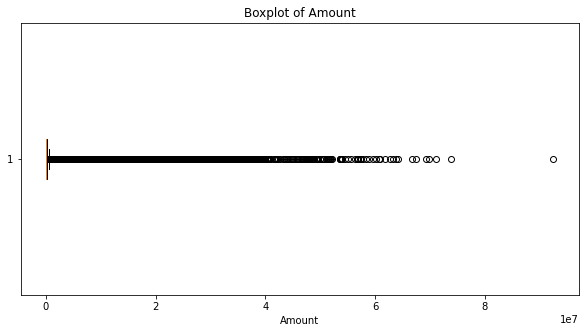

In [27]:
# lets visualise the amount column to better understand 
# Boxplot
plt.figure(figsize=(10, 5))
plt.boxplot(df['amount'], vert=False, patch_artist=True)
plt.title('Boxplot of Amount')
plt.xlabel('Amount')
plt.show()


Bolplot of amount showing it has too many outliers

In [28]:
# Filter the DataFrame to remove rows where 'amount' is greater than the 80th percentile because of too many outliers in it
df = df[df['amount'] <= percentile_90]

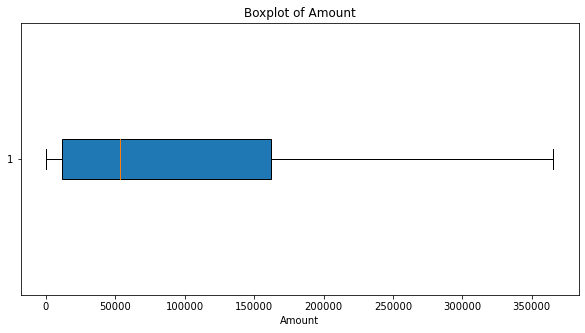

In [29]:
# lets visualise the amount column After outlier treatment
# Boxplot
plt.figure(figsize=(10, 5))
plt.boxplot(df['amount'], vert=False, patch_artist=True)
plt.title('Boxplot of Amount')
plt.xlabel('Amount')
plt.show()

In [30]:
df.isFraud.value_counts()

0    5084394
1     641964
Name: isFraud, dtype: int64

In [31]:
df.amount.describe()

count   5726358.00
mean      95366.31
std       99461.66
min           0.00
25%       11519.22
50%       53495.58
75%      162268.80
max      365423.29
Name: amount, dtype: float64

In [32]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,Status
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,910064.03,919903.67,0,No Fraud
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,910039.71,911903.99,0,No Fraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,Fraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,Fraud
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,54245.57,65913.71,0,No Fraud


In [36]:
df.step.describe()

count   5726358.00
mean        243.69
std         142.22
min           1.00
25%         156.00
50%         239.00
75%         334.00
max         743.00
Name: step, dtype: float64

Creating bins for step count to visualise

In [37]:
max_step = df['step'].max()
# Define the number of weekly bins (5 weeks, each with 168 hours)
weekly_bins = np.arange(0, max_step + 168, 168)  # Adding 168 to include the upper boundary  # Adding 745 to include the upper boundary

# Create the bin labels
bin_labels = [f'Week {i+1}' for i in range(len(weekly_bins) - 1)]

# Create the bins and ensure labels are of type VARCHAR (string)
df['Step_Bucket'] = pd.cut(df['step'], bins=weekly_bins, labels=bin_labels, right=False, include_lowest=True)

# Ensure the Step_Bucket column is of type string (VARCHAR)
df['Step_Bucket'] = df['Step_Bucket'].astype(str)

# Display the DataFrame with the new column
#print(df.head())

# Display the distribution of the bins in ascending order
print(df['Step_Bucket'].value_counts().sort_index())

Week 1    1722502
Week 2    2582073
Week 3    1151173
Week 4     210413
Week 5      60197
Name: Step_Bucket, dtype: int64


In [38]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
Status            0
Step_Bucket       0
dtype: int64

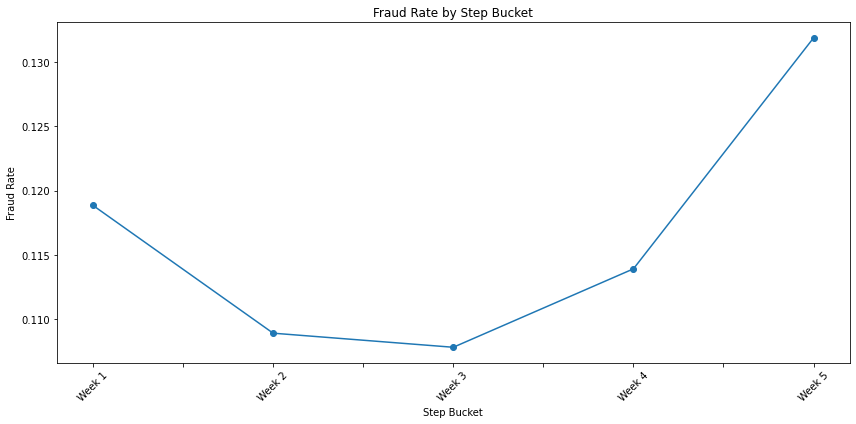

In [39]:
# Line plot of fraud rate over step buckets
fraud_rate = df.groupby('Step_Bucket')['isFraud'].mean()
plt.figure(figsize=(12, 6))
fraud_rate.plot(kind='line', marker='o')
plt.title('Fraud Rate by Step Bucket')
plt.xlabel('Step Bucket')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The sharp increase in fraud rate during Weeks 4 and 5 warrants immediate investigation, as it could indicate evolving fraud tactics or reduced security measures towards the end of the period.

### EDA- EXPLORATORY DATA ANALYSIS

In [40]:
df.isnull().sum()
#there is no null value in the dataset

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
Status            0
Step_Bucket       0
dtype: int64

In [41]:
# Dataset information and checking the Datatypes of all the columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5726358 entries, 0 to 6362615
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int32  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  Status          object 
 11  Step_Bucket     object 
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 546.1+ MB


In [42]:
df.isFraud.value_counts()

0    5084394
1     641964
Name: isFraud, dtype: int64

In [43]:
df.type.value_counts() 
#Cashout and Payments are having hight value counts in the data

PAYMENT     2151495
CASH_OUT    2033730
CASH_IN     1286405
TRANSFER     213302
DEBIT         41426
Name: type, dtype: int64

In [44]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,Status,Step_Bucket
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,910064.03,919903.67,0,No Fraud,Week 1
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,910039.71,911903.99,0,No Fraud,Week 1
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,Fraud,Week 1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,Fraud,Week 1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,54245.57,65913.71,0,No Fraud,Week 1


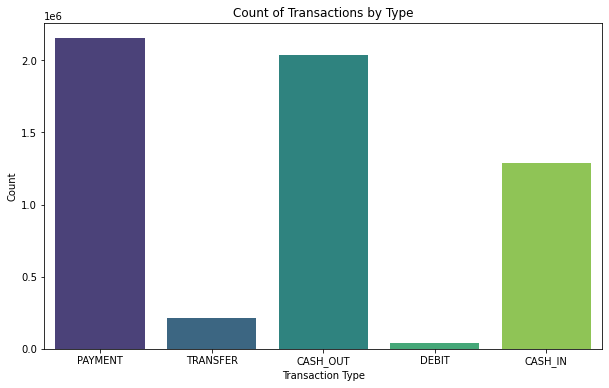

In [45]:
# transaction count by type
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df, palette='viridis')
plt.title('Count of Transactions by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()


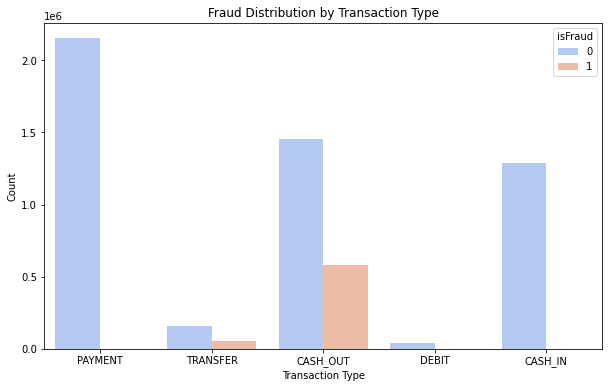

In [46]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type', hue='isFraud', data=df, palette='coolwarm')
plt.title('Fraud Distribution by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()


### Data Visualisation

In [47]:
target = 'isFraud'
# setting up target as the target variable

In [48]:
# Segregate the counting to plot and visualize the methods of transactions.
type = df['type'].value_counts()
transactions = type.index
quantity = type.values
quantity

array([2151495, 2033730, 1286405,  213302,   41426], dtype=int64)

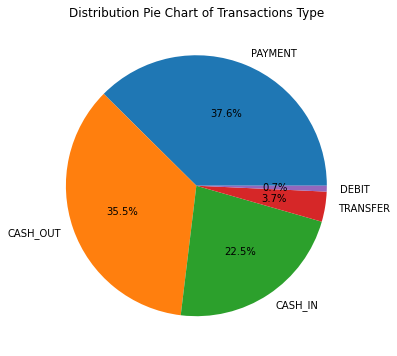

In [49]:
# By plotting the pie chart, visualize the whole dataset.
plt.figure(figsize=(15, 6))
plt.pie(quantity, labels=transactions, autopct="%1.1f%%")
plt.title('Distribution Pie Chart of Transactions Type')
#plt.savefig('C:/Users/Ashyy/Desktop/NIT-Data Analytics/pie_chart.png')
plt.show()

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5726358 entries, 0 to 6362615
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int32  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  Status          object 
 11  Step_Bucket     object 
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 546.1+ MB


In [51]:
# checking correlation of different feature with target variable 
# Checking for the relation of different features with the target variable.
correlation = df.corr()
correlation[target].sort_values(ascending=False)

isFraud           1.00
amount            0.28
oldbalanceDest    0.01
newbalanceDest   -0.00
step             -0.01
oldbalanceOrg    -0.12
newbalanceOrig   -0.14
Name: isFraud, dtype: float64

In [52]:
df.amount.describe()

count   5726358.00
mean      95366.31
std       99461.66
min           0.00
25%       11519.22
50%       53495.58
75%      162268.80
max      365423.29
Name: amount, dtype: float64

Amount binning

In [53]:
# Define the number of bins
num_bins = 12

# Define the bin edges
bin_edges = np.linspace(0, 365423.29, num_bins + 1)

# Create labels for the bins in 'K' format without decimals and with $ attached
bin_labels = [f"${int(start/1000)}K-{int(end/1000)}K" for start, end in zip(bin_edges[:-1], bin_edges[1:])]

# Create the bins and assign the labels
df['Amount_Bin_Bucket'] = pd.cut(df['amount'], bins=bin_edges, labels=bin_labels, right=False, include_lowest=True)

# Display the DataFrame with the new column
#print(df.head())

# Display the distribution of the bins
print(df['Amount_Bin_Bucket'].value_counts().sort_index())

$0K-30K       2396411
$30K-60K       581916
$60K-91K       430665
$91K-121K      398974
$121K-152K     371963
$152K-182K     336238
$182K-213K     296655
$213K-243K     254242
$243K-274K     214646
$274K-304K     178979
$304K-334K     146893
$334K-365K     118775
Name: Amount_Bin_Bucket, dtype: int64


In [54]:
df.shape

(5726358, 13)

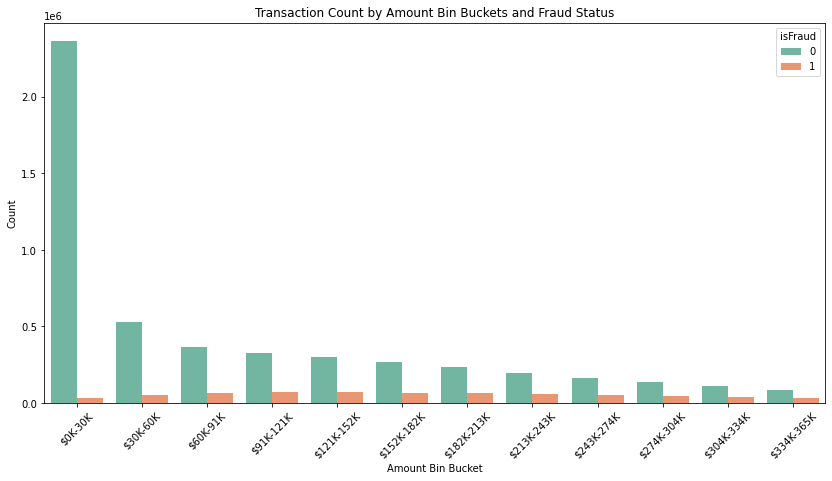

In [55]:
# Plot
plt.figure(figsize=(14, 7))
sns.countplot(x='Amount_Bin_Bucket', hue='isFraud', data=df, palette='Set2')
plt.title('Transaction Count by Amount Bin Buckets and Fraud Status')
plt.xlabel('Amount Bin Bucket')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Fraud occurs across all transaction amounts but is proportionally higher in larger transactions. While most transactions fall in the lowest bracket ($0-$30K), the fraud ratio increases in higher brackets. Fraud detection should focus on larger amounts without neglecting the high volume of smaller transactions.

In [56]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,Status,Step_Bucket,Amount_Bin_Bucket
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,910064.03,919903.67,0,No Fraud,Week 1,$0K-30K
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,910039.71,911903.99,0,No Fraud,Week 1,$0K-30K
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,Fraud,Week 1,$0K-30K
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,Fraud,Week 1,$0K-30K
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,54245.57,65913.71,0,No Fraud,Week 1,$0K-30K


In [57]:
df.Step_Bucket.value_counts()

Week 2    2582073
Week 1    1722502
Week 3    1151173
Week 4     210413
Week 5      60197
Name: Step_Bucket, dtype: int64

In [58]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,Status,Step_Bucket,Amount_Bin_Bucket
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,910064.03,919903.67,0,No Fraud,Week 1,$0K-30K
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,910039.71,911903.99,0,No Fraud,Week 1,$0K-30K
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,Fraud,Week 1,$0K-30K
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,Fraud,Week 1,$0K-30K
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,54245.57,65913.71,0,No Fraud,Week 1,$0K-30K


In [59]:
df.shape

(5726358, 13)

### Feature Extraction

In [60]:
# Create features balanceOrig_diff and balanceDest_diff
df['balanceOrig_diff'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balanceDest_diff'] = df['oldbalanceDest'] - df['newbalanceDest']
df['trans_rate'] = df['amount'] / (df['oldbalanceOrg'] + 1)  # Avoid division by zero


In [61]:

# Encoding categorical features
df['type_encoded'] = df['type'].map({
    'PAYMENT': 0, 
    'TRANSFER': 1, 
    'CASH_OUT': 2, 
    'DEBIT': 3, 
    'CASH_IN': 4
})
#creating new features using our dataset columns and encoding the type column

### Feature Selection

selecting most relevant features as per our analysis for model building 

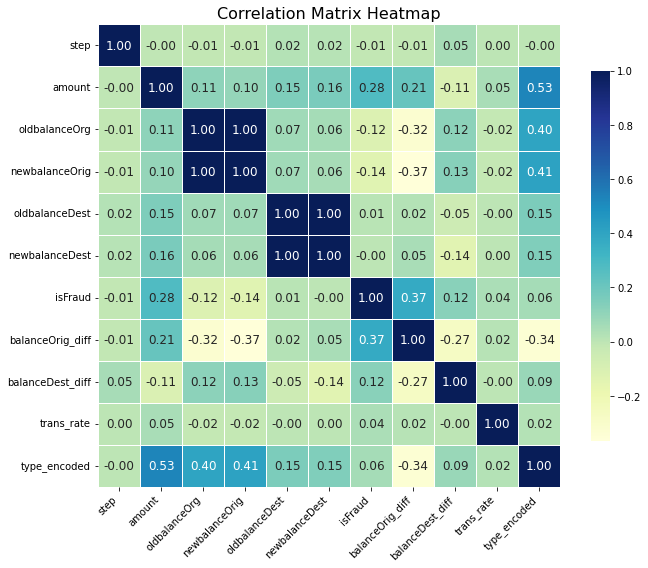

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
sns.heatmap(correlation_matrix, 
            annot=True,          
            cmap='YlGnBu',    
            fmt='.2f',          
            linewidths=0.5,      
            linecolor='white',   
            cbar_kws={'shrink': 0.8},  
            square=True,         
            annot_kws={'size': 12}) 
plt.title('Correlation Matrix Heatmap', fontsize=16)  # Title with a larger font size
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better fit
plt.yticks(rotation=0)  # Rotate y-axis labels for better fit
plt.tight_layout()      # Adjust layout to make room for the axes
plt.show()

The heatmap reveals strong correlations between balance-related variables and moderate correlations between fraud and certain transaction characteristics. Notably, the amount shows a weak negative correlation with fraud, suggesting larger transactions aren't necessarily more likely to be fraudulent.

oldbalanceOrg and newbalanceOrig are showing 1 corelation and same newbalanceDest and oldbalanceDest too showing 1 correlation we may only need to take one column from both for the model building part 

In [63]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceOrig_diff,balanceDest_diff,trans_rate,type_encoded
count,5726358.00,5726358.00,5726358.00,5726358.00,5726358.00,5726358.00,5726358.00,5726358.00,5726358.00,5726358.00,5726358.00
mean,243.69,95366.31,1018538.39,987111.88,1180391.29,1196449.33,0.11,31426.51,-16058.03,42.22,1.67
std,142.22,99461.66,2894281.81,2940577.75,2895603.12,2921464.63,0.32,134161.94,275297.64,907.11,1.53
min,1.00,0.00,0.00,-365304.57,-362169.58,0.00,0.00,-365423.16,-57903515.40,0.00,0.00
25%,156.00,11519.22,24250.03,546.53,265231.19,252583.19,0.00,1139.71,-98267.83,0.04,0.00
50%,239.00,53495.58,151082.00,148002.10,596807.82,559833.63,0.00,14249.94,-13359.55,0.27,2.00
75%,334.00,162268.80,633645.14,564657.29,935193.53,965791.00,0.00,98585.63,-593.65,1.97,2.00
max,743.00,365423.29,43818855.30,43686616.33,356015889.35,356179278.92,1.00,365423.29,5353303.67,332729.54,4.00


In [64]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'Status',
       'Step_Bucket', 'Amount_Bin_Bucket', 'balanceOrig_diff',
       'balanceDest_diff', 'trans_rate', 'type_encoded'],
      dtype='object')

In [65]:
# Select columns to use as features
features = [
    'amount',
    'oldbalanceOrg',
    #'newbalanceOrig',
    'oldbalanceDest',
    #'newbalanceDest',
    'balanceOrig_diff',
    'balanceDest_diff',
    'trans_rate',
    'type_encoded'
]

X = df[features]
y = df['isFraud']

Since newbalanceOrig and newbalanceDest have a correlation coefficient of 1, it implies that these two columns are perfectly positively correlated. Therefore, we can safely drop one of these columns without losing any significant information, as they essentially represent the same underlying data.

In [66]:
df.shape

(5726358, 17)

### Model training

In [68]:
from sklearn.model_selection import train_test_split
#spliting training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


What is stratify in train_test_split?

stratify ensures that the proportion of target classes (labels) is preserved in both the training and test sets.


It’s useful when you have a biased dataset (e.g., imbalanced classes) and want to create an unbiased split.

In [69]:
from sklearn.tree import DecisionTreeClassifier
start_time = time.time()
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print(f"DecisionTreeClassifier Training Time: {time.time() - start_time:.2f} seconds")

DecisionTreeClassifier Training Time: 74.08 seconds


### Result Evaluation and Result Validation 

In [70]:
# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluation Metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96   1016879
           1       0.71      0.72      0.72    128393

    accuracy                           0.94   1145272
   macro avg       0.84      0.84      0.84   1145272
weighted avg       0.94      0.94      0.94   1145272

Confusion Matrix:
 [[979522  37357]
 [ 36052  92341]]
ROC AUC Score: 0.8412344790706857


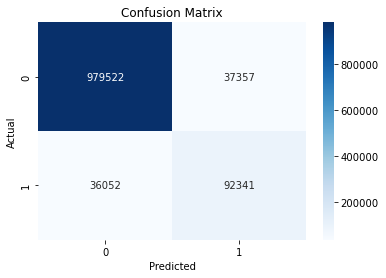

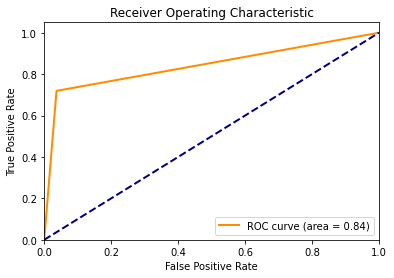

In [71]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


LightGBM Model

In [72]:
import lightgbm as lgb
start_time = time.time()
lgb_train = lgb.Dataset(X_train, y_train)
lgb_params = {
    'objective': 'binary',
    'metric': 'auc',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}
lgb_model = lgb.train(lgb_params, lgb_train, num_boost_round=100)
print(f"LightGBM Training Time: {time.time() - start_time:.2f} seconds")

[LightGBM] [Info] Number of positive: 513571, number of negative: 4067515
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032082 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1535
[LightGBM] [Info] Number of data points in the train set: 4581086, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112107 -> initscore=-2.069399
[LightGBM] [Info] Start training from score -2.069399
LightGBM Training Time: 9.09 seconds


In [73]:
#Predictions

lgb_pred = (lgb_model.predict(X_test) > 0.5).astype(int)
lgb_pred_proba = lgb_model.predict(X_test)

In [74]:
# Evaluation Metrics

print("Classification Report:\n", classification_report(y_test, lgb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, lgb_pred))
print("ROC AUC Score:", roc_auc_score(y_test, lgb_pred_proba))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97   1016879
           1       1.00      0.51      0.67    128393

    accuracy                           0.94   1145272
   macro avg       0.97      0.75      0.82   1145272
weighted avg       0.95      0.94      0.94   1145272

Confusion Matrix:
 [[1016690     189]
 [  63048   65345]]
ROC AUC Score: 0.9799902912212937


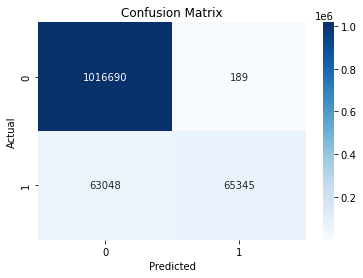

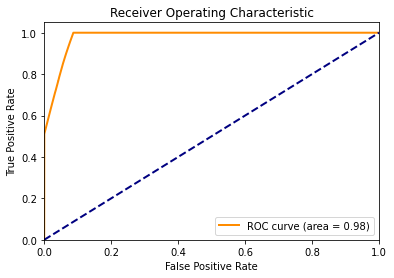

In [75]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, lgb_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, lgb_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


So in final we choose LightGBM as our best model with highest accuracy of 94% and lowest time to train the model apart from that the model is able to predict with higher accuracy for both the classes 